In [0]:
url = "s3://sparta-data/nyt2.json"
nyt = spark.read.json(url).rdd

nyt

Out[93]: MapPartitionsRDD[422] at javaToPython at NativeMethodAccessorImpl.java:0

In [0]:
num_books = nyt.count()
num_books

Out[94]: 10195

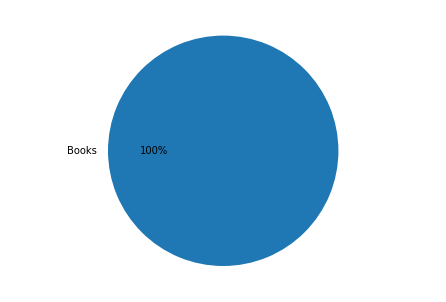

In [0]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
categories = ['Books']
books = [num_books]
ax.pie(books, labels = categories,autopct='%1.0f%%')
plt.show()

In [0]:
nyt.first()

Out[96]: Row(_id=Row($oid='5b4aa4ead3089013507db18b'), amazon_product_url='http://www.amazon.com/Odd-Hours-Dean-Koontz/dp/0553807056?tag=NYTBS-20', author='Dean R Koontz', bestsellers_date=Row($date=Row($numberLong='1211587200000')), description='Odd Thomas, who can communicate with the dead, confronts evil forces in a California coastal town.', price=Row($numberDouble=None, $numberInt='27'), published_date=Row($date=Row($numberLong='1212883200000')), publisher='Bantam', rank=Row($numberInt='1'), rank_last_week=Row($numberInt='0'), title='ODD HOURS', weeks_on_list=Row($numberInt='1'))

In [0]:
nyt.first().asDict()

Out[97]: {'_id': Row($oid='5b4aa4ead3089013507db18b'),
 'amazon_product_url': 'http://www.amazon.com/Odd-Hours-Dean-Koontz/dp/0553807056?tag=NYTBS-20',
 'author': 'Dean R Koontz',
 'bestsellers_date': Row($date=Row($numberLong='1211587200000')),
 'description': 'Odd Thomas, who can communicate with the dead, confronts evil forces in a California coastal town.',
 'price': Row($numberDouble=None, $numberInt='27'),
 'published_date': Row($date=Row($numberLong='1212883200000')),
 'publisher': 'Bantam',
 'rank': Row($numberInt='1'),
 'rank_last_week': Row($numberInt='0'),
 'title': 'ODD HOURS',
 'weeks_on_list': Row($numberInt='1')}

In [0]:
# Questions I want answers to:
# The most successful author. Who should I plagiarise? What is my target audience?
# The most prolific publisher. Who do I want to represent me?
# The most popular book and why. I need some ideas, I have writer's block.
# The most expensive and least expensive books. Profit, profit, profit.
# What you should call your book if you want it to sell like hotcakes.
# What you should write your book about if you want it to sell like hotcakes.

In [0]:
nyt_author = nyt.map(lambda x: (x.author, 1))
nyt_author.take(10)

Out[99]: [('Dean R Koontz', 1),
 ('Stephenie Meyer', 1),
 ('Emily Giffin', 1),
 ('Patricia Cornwell', 1),
 ('Chuck Palahniuk', 1),
 ('James Patterson and Gabrielle Charbonnet', 1),
 ('John Sandford', 1),
 ('Jimmy Buffett', 1),
 ('Elizabeth George', 1),
 ('David Baldacci', 1)]

In [0]:
# This shows top 10 authors, ranked by the number of weeks their books have spent in the NYT bestseller list
top_10_authors = nyt_author.reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], False).take(10)
display(top_10_authors)

_1,_2
John Grisham,226
David Baldacci,222
Danielle Steel,174
Stephen King,157
Anthony Doerr,141
Nicholas Sparks,136
Kristin Hannah,128
Stieg Larsson,121
James Patterson and Maxine Paetro,119
George R R Martin,119


In [0]:
# displays top authors as a bar chart
display(top_10_authors)

_1,_2
John Grisham,226
David Baldacci,222
Danielle Steel,174
Stephen King,157
Anthony Doerr,141
Nicholas Sparks,136
Kristin Hannah,128
Stieg Larsson,121
James Patterson and Maxine Paetro,119
George R R Martin,119


In [0]:
nyt_publishers = nyt.map(lambda x: (x.publisher, 1))
nyt_publishers.take(10)

Out[102]: [('Bantam', 1),
 ('Little, Brown', 1),
 ("St. Martin's", 1),
 ('Putnam', 1),
 ('Doubleday', 1),
 ('Little, Brown', 1),
 ('Putnam', 1),
 ('Little, Brown', 1),
 ('Harper', 1),
 ('Grand Central', 1)]

In [0]:
# This shows top 10 publishers, ranked by the number of weeks their books have spent in the NYT bestseller list
top_10_publishers = nyt_publishers.reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], False).take(10)
display(top_10_publishers)

_1,_2
Putnam,1061
"Little, Brown",943
Grand Central,619
Knopf,559
Doubleday,475
Scribner,456
Ballantine,421
Delacorte,347
Bantam,319
Simon & Schuster,308


In [0]:
# displays top publishers as a bar chart
display(top_10_publishers)

_1,_2
Putnam,1061
"Little, Brown",943
Grand Central,619
Knopf,559
Doubleday,475
Scribner,456
Ballantine,421
Delacorte,347
Bantam,319
Simon & Schuster,308


In [0]:
nyt_books = nyt.map(lambda x: (x.title, 1))
nyt_books.take(10)

Out[105]: [('ODD HOURS', 1),
 ('THE HOST', 1),
 ("LOVE THE ONE YOU'RE WITH", 1),
 ('THE FRONT', 1),
 ('SNUFF', 1),
 ('SUNDAYS AT TIFFANY’S', 1),
 ('PHANTOM PREY', 1),
 ('SWINE NOT?', 1),
 ('CARELESS IN RED', 1),
 ('THE WHOLE TRUTH', 1)]

In [0]:
# This shows top 10 books, ranked by the number of weeks their books have spent in the NYT bestseller list
top_10_books = nyt_books.reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], False).take(10)
display(top_10_books)

_1,_2
ALL THE LIGHT WE CANNOT SEE,141
THE HELP,114
A DANCE WITH DRAGONS,106
THE NIGHTINGALE,87
GONE GIRL,87
THE GIRL WHO KICKED THE HORNET’S NEST,80
THE GIRL ON THE TRAIN,80
THE GOLDFINCH,68
THE HOST,68
A GENTLEMAN IN MOSCOW,63


In [0]:
# This displays the top 10 books in a bar chart
display(top_10_books)

_1,_2
ALL THE LIGHT WE CANNOT SEE,141
THE HELP,114
A DANCE WITH DRAGONS,106
THE NIGHTINGALE,87
GONE GIRL,87
THE GIRL WHO KICKED THE HORNET’S NEST,80
THE GIRL ON THE TRAIN,80
THE GOLDFINCH,68
THE HOST,68
A GENTLEMAN IN MOSCOW,63


In [0]:
# WHat is the most expensive and the least expensive book
nyt_book_price = nyt.map(lambda x: (x.title, x.price[0]))
nyt_book_price.take(5)

Out[108]: [('ODD HOURS', None),
 ('THE HOST', '25.99'),
 ("LOVE THE ONE YOU'RE WITH", '24.95'),
 ('THE FRONT', '22.95'),
 ('SNUFF', '24.95')]

In [0]:
# Some of the books are free, which is unnacceptable. Get rid of 'em'
nyt_book_price = nyt.filter(lambda x: 'price' in x).filter(lambda x: x.price[0] is not None)

In [0]:
# Most expensive book, wow that is very expensive. Get it for your dad for christmas. Great profit margin
nyt_book_price_capitalism = nyt_book_price.map(lambda x: (x.title, x.price[0]))
nyt_book_price_capitalism.sortBy(lambda x: x[1], False).first()

Out[110]: ('A MEMORY OF LIGHT', '34.99')

In [0]:
# The cheapest book (that isn't free, we have families to feed), what a bargain. Buy 10 of 'em. Great stocking filler. 
nyt_book_price_capitalism.sortBy(lambda x: x[1], True).first()

Out[111]: ('BLOCKADE BILLY', '14.99')

In [0]:
from wordcloud import WordCloud, STOPWORDS

In [0]:
text = nyt_books.map(lambda x: x[0]).collect()
textstr = " ".join(text)

In [0]:
wc = WordCloud().generate(textstr)

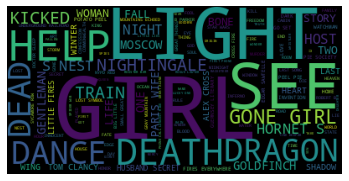

In [0]:
# A gorgeous visualisation of all the most popular words in the book titles. If you want your book to be in the top 10 for the longest amount of time, make sure you call it something with these words in it.
x = plt.figure()
plt.imshow(wc)
plt.axis("off")
display(x)

In [0]:
nyt_descriptions_best = nyt.map(lambda x: (x.description))
text2 = nyt_descriptions_best.collect()
textstr2 = " ".join(text2)

In [0]:
wc2 = WordCloud(stopwords=STOPWORDS).generate(textstr2)

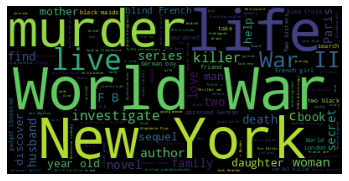

In [0]:
# A gorgeous visualisation of all the most popular things to write about. If you want your book to be in the top 10 for the longest amount of time, make sure you write about these things
x2 = plt.figure()
plt.imshow(wc2)
plt.axis("off")
display(x2)

In [0]:
# Questions I want answers to:
# The most successful author. Who should I plagiarise? What is my target audience? - 
John Grisham, Dads are my target audience
# The most prolific publisher. Who do I want to represent me?
Putnam
# The most popular book. I need some ideas, I have writer's block.
All the light we cannot see
# The most expensive and least expensive books. Profit, profit, profit.
$34.99
# What you should call your book if you want it to sell like hotcakes.
'Dragon Girl: Help her see the light'
# What you should write your book about if you want it to sell like hotcakes.
'A new murder during a war in York and all the world is watching'